In [1]:
# The goal for this week’s project is to build and train a regression model on the Capital Bike Share (Washington, D.C.) 
# Kaggle data set, in order to predict demand for bicycle rentals at any given hour, based on time and weather, e.g.:
    
# “Given the forecasted weather conditions, how many bicycles can we expect to be rented out (city-wide) this Saturday at 2pm?”

# split the data into a training and test set
# conduct an exploratory data analysis
# train a regression model
# iteratively optimize the model by expanding or selecting features
# regularize the model to avoid overfitting
# calculate a RMSLE for the training and test set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#LOADING DATA

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
#EXPLORING DATA

In [6]:
print(df_train.shape)
print(df_test.shape)

(10886, 12)
(6493, 9)


In [7]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
df_test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [11]:
# Saving of 'year', 'month', 'day', 'hour' and 'day values' separately in columns

df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

df_train['year'] = df_train['datetime'].apply(lambda x: x.year)
df_train['month'] = df_train['datetime'].apply(lambda x: x.month)
df_train['day'] = df_train['datetime'].apply(lambda x: x.day)
df_train['hour'] = df_train['datetime'].apply(lambda x: x.hour)

df_test['year'] = df_test['datetime'].apply(lambda x: x.year)
df_test['month'] = df_test['datetime'].apply(lambda x: x.month)
df_test['day'] = df_test['datetime'].apply(lambda x: x.day)
df_test['hour'] = df_test['datetime'].apply(lambda x: x.hour)

In [12]:
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [13]:
df_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [14]:
# Deleting 'datetime' by adding 'year', 'month', 'day', 'hour'
# Deleting 'casual' and 'registered' columns because they are not part of the test data

df_train = df_train.drop(['datetime', 'casual', 'registered'], axis=1)
df_train = df_train.drop(['datetime'], axis=1)

KeyError: "['datetime'] not found in axis"

In [15]:
df_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [16]:
df_test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


<AxesSubplot:xlabel='year', ylabel='count'>

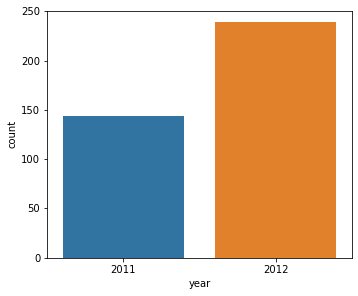

In [17]:
# Counting by year

fig = plt.figure(figsize=[12,10])

fig.add_subplot(2,2,1)
sns.barplot(x='year',y='count',data=df_train.groupby('year')['count'].mean().reset_index())

<AxesSubplot:xlabel='month', ylabel='count'>

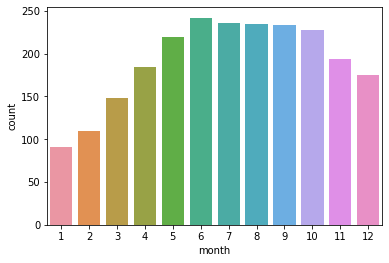

In [18]:
# Counting by month

fig.add_subplot(2,2,2)
sns.barplot(x='month',y='count',data=df_train.groupby('month')['count'].mean().reset_index())

<AxesSubplot:xlabel='day', ylabel='count'>

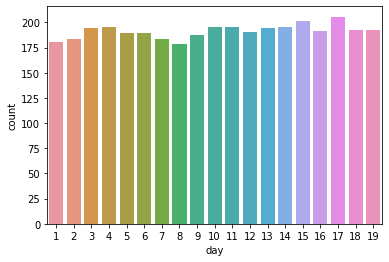

In [19]:
# Counting by date

fig.add_subplot(2,2,3)
sns.barplot(x='day',y='count',data=df_train.groupby('day')['count'].mean().reset_index())

<AxesSubplot:xlabel='hour', ylabel='count'>

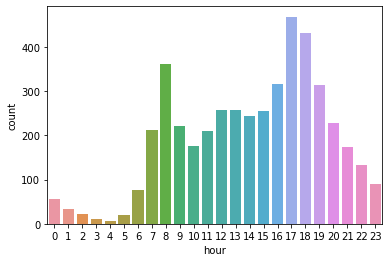

In [20]:
# Counting by time

fig.add_subplot(2,2,4)
sns.barplot(x='hour',y='count',data=df_train.groupby('hour')['count'].mean().reset_index())

In [21]:
# Identifying the number of rentals by season, holiday, working day and weather

fig = plt.figure(figsize=[12,10])

<Figure size 864x720 with 0 Axes>

<AxesSubplot:xlabel='workingday', ylabel='count'>

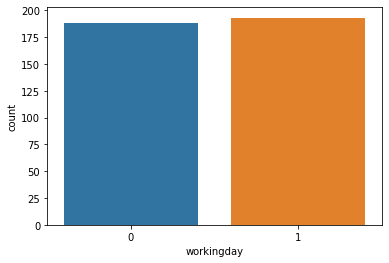

In [22]:
# Counting by workingday

fig.add_subplot(2,2,1)
sns.barplot(x='workingday',y='count',data=df_train.groupby('workingday')['count'].mean().reset_index())

<AxesSubplot:xlabel='holiday', ylabel='count'>

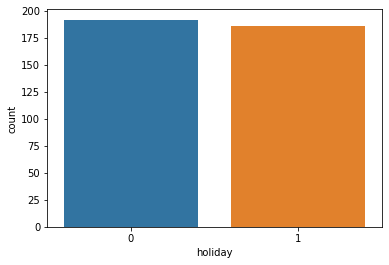

In [23]:
# Counting by holiday

fig.add_subplot(2,2,2)
sns.barplot(x='holiday',y='count',data=df_train.groupby('holiday')['count'].mean().reset_index())

<AxesSubplot:xlabel='season', ylabel='count'>

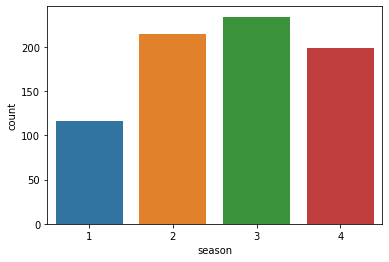

In [24]:
# Counting by season

fig.add_subplot(2,2,3)
sns.barplot(x='season',y='count',data=df_train.groupby('season')['count'].mean().reset_index())

<AxesSubplot:xlabel='weather', ylabel='count'>

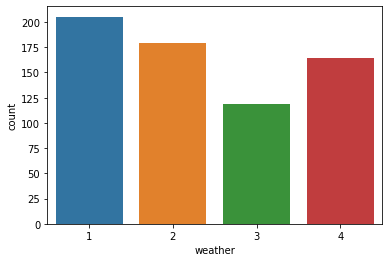

In [25]:
# Counting by weather

fig.add_subplot(2,2,4)
sns.barplot(x='weather',y='count',data=df_train.groupby('weather')['count'].mean().reset_index())

In [26]:
# DATA CLEANING

In [27]:
df_train.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
5,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6
7,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7
8,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8
9,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9


In [28]:
# Checking the count by value in 'windspeed' (consecutive 0 values)

df_train['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<AxesSubplot:title={'center':'< Test Data Windspeed >'}, xlabel='windspeed', ylabel='count'>

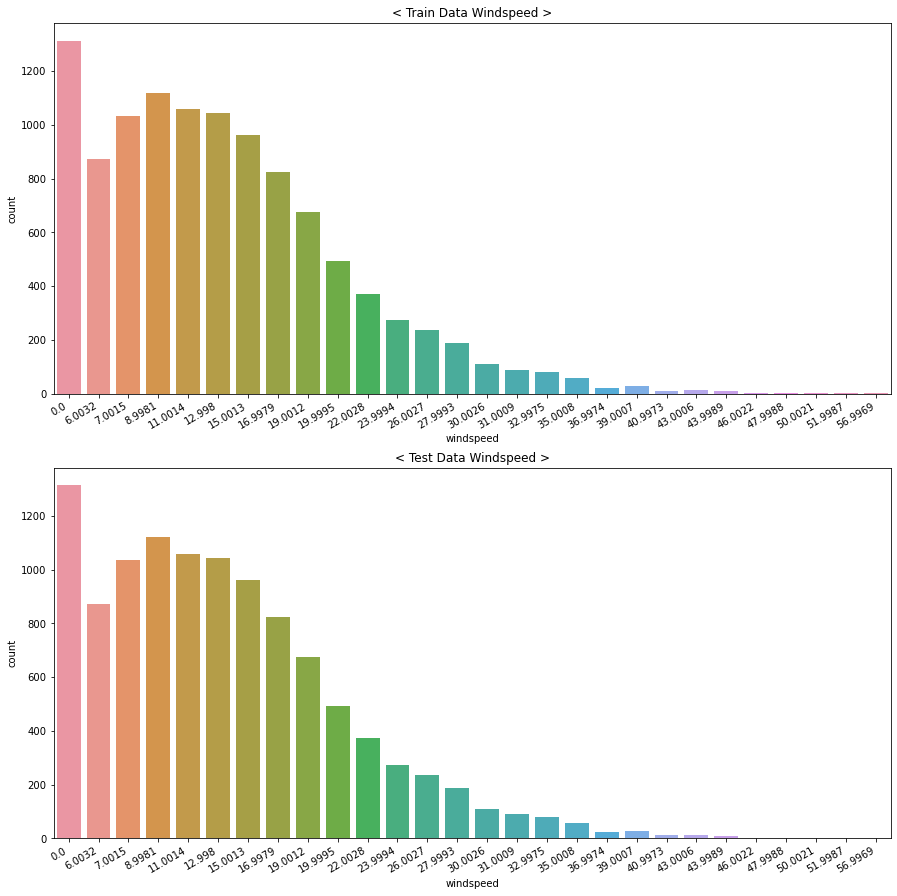

In [29]:
# As a result of checking the wind speed graph, there are many 0 values for both Train and Test

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="< Train Data Windspeed >")
sns.countplot(data=df_train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="< Test Data Windspeed >")
sns.countplot(data=df_train, x="windspeed", ax=axes[1])

In [30]:
# Finding the average value and put it in the row with 0 wind speed

df_train.loc[df_train["windspeed"] == 0, "windspeed"] = df_train["windspeed"].mean()
df_test.loc[df_test["windspeed"] == 0, "windspeed"] = df_test["windspeed"].mean()

<AxesSubplot:title={'center':'< Test Data Windspeed >'}, xlabel='windspeed', ylabel='count'>

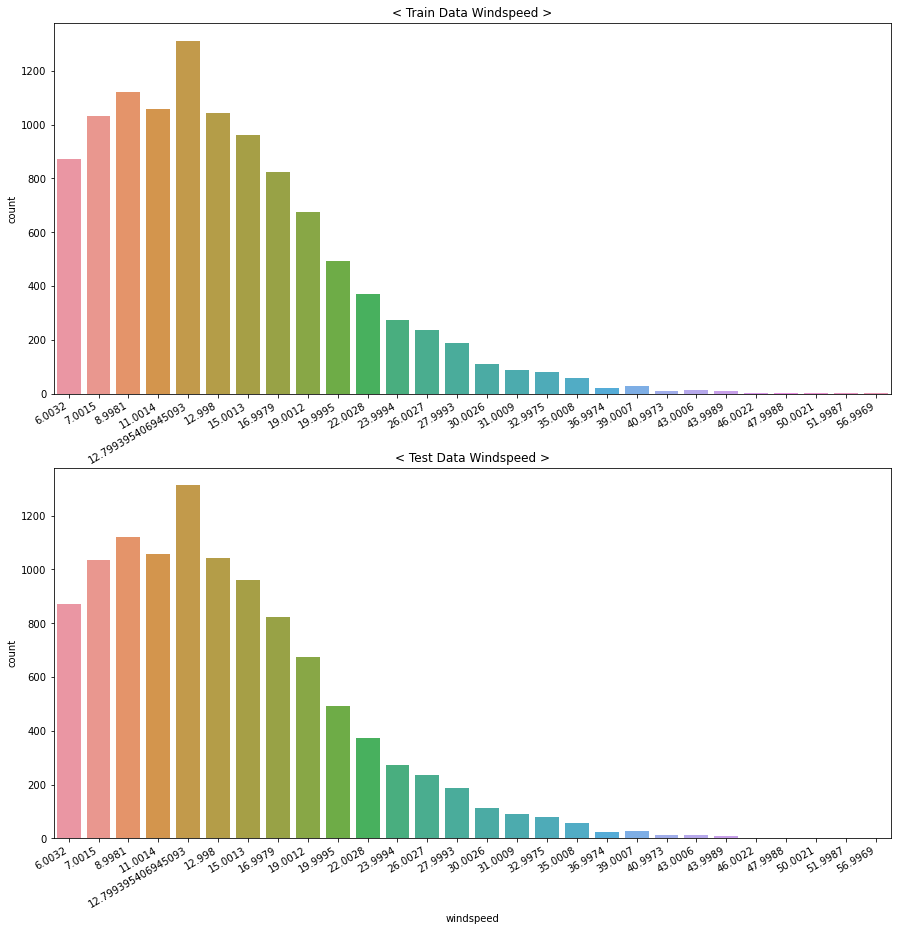

In [31]:
# Checking the graph after correcting the wind speed value

fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,15)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="< Train Data Windspeed >")
sns.countplot(data=df_train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="< Test Data Windspeed >")
sns.countplot(data=df_train, x="windspeed", ax=axes[1])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

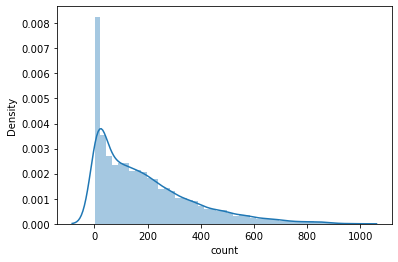

In [32]:
sns.distplot(df_train['count'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

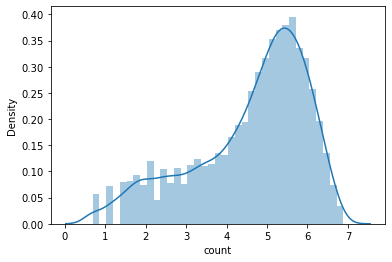

In [33]:
sns.distplot(np.log1p(df_train['count']))

In [34]:
# Counting the value before change

df_train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [35]:
# Counting the value after log application

df_train['count'] = np.log1p(df_train['count'])
df_train['count']

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: count, Length: 10886, dtype: float64

In [36]:
# MODEL SELECTION

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [38]:
# Creating Root Mean Square Log Error

def RMSLE(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2 
    RMSLE = np.sqrt(np.mean(squared_error))
    return RMSLE

In [39]:
# Test/Train Data Split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['count'], axis=1), df_train['count'], test_size=0.3)

In [40]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RMSLE:', RMSLE(y_test_exp, pred_exp))

RMSLE: 1.0288204630007807


<AxesSubplot:>

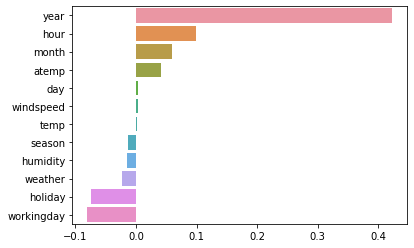

In [41]:
# Visualize the regression coefficient values of each feature

coef = pd.Series(linreg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [42]:
# One-Hot Encoding is applied to both train and test data
# The day value is subtracted because the train data and test data days are different 
# The regression coefficient value is also low

df_train = pd.get_dummies(df_train, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])
df_test = pd.get_dummies(df_test, columns=['year', 'month', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [43]:
print(df_train.shape)
print(df_train.shape)

(10886, 56)
(10886, 56)


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  float64
 5   day           10886 non-null  int64  
 6   year_2011     10886 non-null  uint8  
 7   year_2012     10886 non-null  uint8  
 8   month_1       10886 non-null  uint8  
 9   month_2       10886 non-null  uint8  
 10  month_3       10886 non-null  uint8  
 11  month_4       10886 non-null  uint8  
 12  month_5       10886 non-null  uint8  
 13  month_6       10886 non-null  uint8  
 14  month_7       10886 non-null  uint8  
 15  month_8       10886 non-null  uint8  
 16  month_9       10886 non-null  uint8  
 17  month_10      10886 non-null  uint8  
 18  month_11      10886 non-nu

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      6493 non-null   datetime64[ns]
 1   temp          6493 non-null   float64       
 2   atemp         6493 non-null   float64       
 3   humidity      6493 non-null   int64         
 4   windspeed     6493 non-null   float64       
 5   day           6493 non-null   int64         
 6   year_2011     6493 non-null   uint8         
 7   year_2012     6493 non-null   uint8         
 8   month_1       6493 non-null   uint8         
 9   month_2       6493 non-null   uint8         
 10  month_3       6493 non-null   uint8         
 11  month_4       6493 non-null   uint8         
 12  month_5       6493 non-null   uint8         
 13  month_6       6493 non-null   uint8         
 14  month_7       6493 non-null   uint8         
 15  month_8       6493 non-null   uint8   

In [46]:
# Matching the shape of df_train and df_test

df_train, df_test = df_train.align(df_test, join='left', axis=1)
df_test = df_test.drop(['count'], axis=1)
print(df_train.shape)
print(df_test.shape)
df_train.info()
df_test.info()

(10886, 56)
(6493, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  float64
 5   day           10886 non-null  int64  
 6   year_2011     10886 non-null  uint8  
 7   year_2012     10886 non-null  uint8  
 8   month_1       10886 non-null  uint8  
 9   month_2       10886 non-null  uint8  
 10  month_3       10886 non-null  uint8  
 11  month_4       10886 non-null  uint8  
 12  month_5       10886 non-null  uint8  
 13  month_6       10886 non-null  uint8  
 14  month_7       10886 non-null  uint8  
 15  month_8       10886 non-null  uint8  
 16  month_9       10886 non-null  uint8  
 17  month_10      10886 non-null  uint8  
 18  mon

In [47]:
# Separate training data and test data again

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['count'], axis=1), df_train['count'], test_size=0.3)

In [48]:
# Linear Regression training/prediction/evaluation

linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred = linreg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('LinearRegression RMSLE:', RMSLE(y_test_exp, pred_exp))

LinearRegression RMSLE: 0.5886219301001605


In [49]:
# Ridge model training/prediction/evaluation

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Ridge RMSLE:', RMSLE(y_test_exp, pred_exp))

Ridge RMSLE: 0.5902124419986343


In [50]:
# Lasso model training/prediction/evaluation

lasreg = Lasso(alpha=0.01)
lasreg.fit(X_train, y_train)
pred = lasreg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('Lasso RMSLE:', RMSLE(y_test_exp, pred_exp))

Lasso RMSLE: 0.639634079660348


<AxesSubplot:>

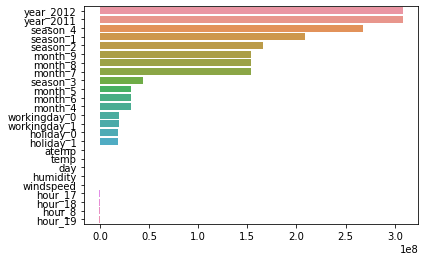

In [51]:
# Extracting top 25 features of linear regression coefficients

coef = pd.Series(linreg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<AxesSubplot:>

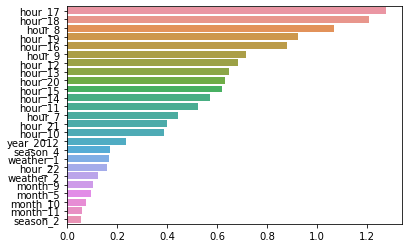

In [52]:
# Extracting top 25 features of the Ridge regression coefficient.

coef = pd.Series(ridge.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

coef = pd.Series(ridge.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<AxesSubplot:>

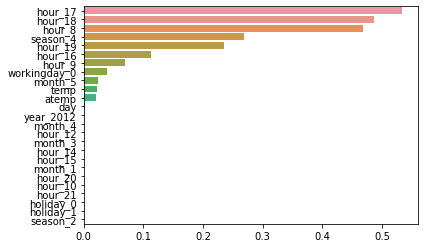

In [53]:
# Extracting top 25 features of the Lasso regression coefficient

coef = pd.Series(lasreg.coef_, index=X_train.columns)
coef_sort = coef.sort_values(ascending=False)[:25]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [54]:
# DECISION TREE

In [55]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [56]:
rf_reg = RandomForestRegressor(n_estimators=50)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', RMSLE(y_test_exp, pred_exp))

RandomForestRegressor RMSLE: 0.3484331162423516


In [57]:
# HYPERPARAMETER OPTIMIZATION

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [59]:
# Hyperparameters using GridSearchCV

tuned_parameters = {'n_estimators': [100,200,300,500], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [60]:
rf_reg = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring='neg_mean_squared_log_error', n_jobs=-1, verbose=1)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan -0.00882563 -0.00883004
 -0.00879792 -0.0088149  -0.0089049  -0.00881115 -0.00884999 -0.00883235
         nan         nan         nan         nan -0.08020641 -0.08012239
 -0.08015468 -0.08013245 -0.08005254 -0.08015117 -0.08021195 -0.08018092
         nan         nan         nan         nan -0.06412954 -0.06411589
 -0.06414826 -0.06414078 -0.06415428 -0.0641737  -0.06414623 -0.06415564
         nan         nan         nan         nan -0.05117162 -0.05133921
 -0.05134121 -0.05140454 -0.05136578 -0.05131957 -0.05137291 -0.05142314]
  warnings.warn(


In [61]:
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
print('RandomForestRegressor RMSLE:', RMSLE(y_test_exp, pred_exp))

RandomForestRegressor RMSLE: 0.34772035789521494


In [62]:
rf_reg.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}

In [63]:
# PREDICITION

In [64]:
X_train = df_train.drop(['count'], axis=1)
y_train = df_train['count']

# Test Data ( test.csv )
X_test = df_test

In [65]:
X_test.head(10)

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,10.66,11.365,56,26.002700,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
1,10.66,13.635,56,12.631157,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,10.66,13.635,56,12.631157,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
3,10.66,12.880,56,11.001400,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
4,10.66,12.880,56,11.001400,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
5,9.84,11.365,60,15.001300,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
6,9.02,10.605,60,15.001300,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
7,9.02,10.605,55,15.001300,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
8,9.02,10.605,55,19.001200,20,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
9,9.84,11.365,52,15.001300,20,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0


In [66]:
# After applying hyperparameters to the Random Forest Regressor model with highest performance evaluation index, the test data predictions are submitted

In [67]:
# Return an estimator that has already been trained by refit of GridSearchCV

best_rf_reg = rf_reg.best_estimator_

In [68]:
# Prediction processing with the optimal model with GridSearchCV

pred = best_rf_reg.predict(X_test)
pred_exp = np.expm1(pred)
print(pred[0:10])

[2.51096313 1.78224943 1.80343186 1.59222304 1.03886452 2.07036213
 3.53428737 4.25072712 5.2909658  4.71003373]


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

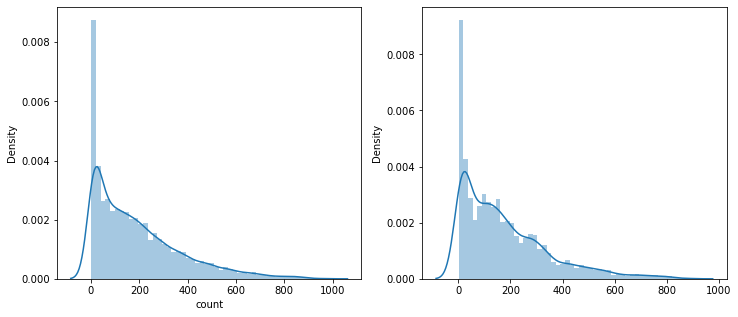

In [69]:
# Compare the actual target value with the predicted target value

y_train_exp = np.expm1(y_train)

fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train_exp,ax=ax1,bins=50)
sns.distplot(pred_exp,ax=ax2,bins=50)

In [70]:
# Check Submission Sample Data

submission = pd.read_csv('sampleSubmission.csv')
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [71]:
# Put the predicted value in the count value
# Find the expected number of bicycles in the count column

submission.loc[:, 'count'] = pred_exp
submission

,datetime,count
0,2011-01-20 00:00:00,11.316787
1,2011-01-20 01:00:00,4.943210
2,2011-01-20 02:00:00,5.070445
3,2011-01-20 03:00:00,3.914662
4,2011-01-20 04:00:00,1.826006
...,...,...
6488,2012-12-31 19:00:00,187.764765
6489,2012-12-31 20:00:00,144.101817
6490,2012-12-31 21:00:00,117.300084
6491,2012-12-31 22:00:00,104.637275


In [72]:
# END